In [66]:
from transformers import GPT2LMHeadModel

In [67]:
model=GPT2LMHeadModel.from_pretrained('gpt2')
sd=model.state_dict()
for k,v in sd.items():
    print(k,v.shape)


transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [68]:
(sd["lm_head.weight"]==sd["transformer.wte.weight"]).all()

tensor(True)

In [69]:
print(sd['transformer.wte.weight'].data_ptr())
print(sd['lm_head.weight'].data_ptr())

13449134080
13449134080


In [73]:
sd['transformer.wte.weight'].data

tensor([[-0.1101, -0.0393,  0.0331,  ..., -0.1364,  0.0151,  0.0453],
        [ 0.0403, -0.0486,  0.0462,  ...,  0.0861,  0.0025,  0.0432],
        [-0.1275,  0.0479,  0.1841,  ...,  0.0899, -0.1297, -0.0879],
        ...,
        [-0.0445, -0.0548,  0.0123,  ...,  0.1044,  0.0978, -0.0695],
        [ 0.1860,  0.0167,  0.0461,  ..., -0.0963,  0.0785, -0.0225],
        [ 0.0514, -0.0277,  0.0499,  ...,  0.0070,  0.1552,  0.1207]])

(-0.5, 767.5, 1023.5, -0.5)

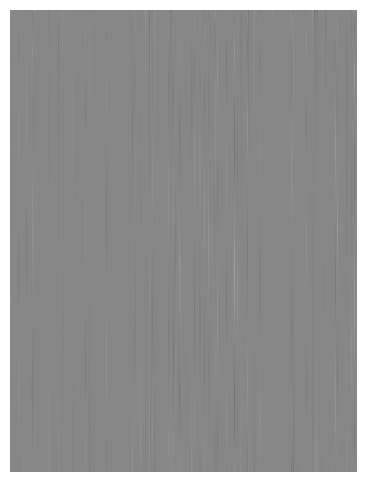

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.imshow(sd['transformer.wpe.weight'],cmap='gray')
plt.axis('off')

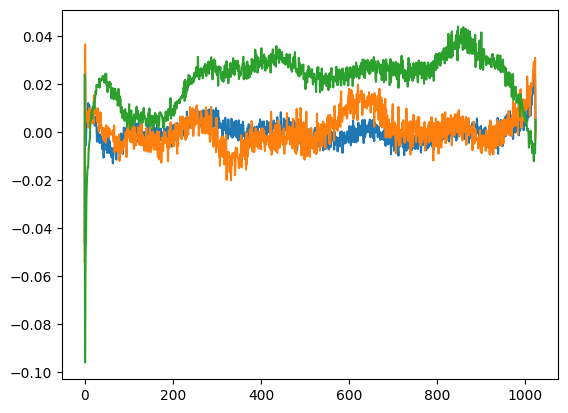

In [26]:
plt.plot(sd['transformer.wpe.weight'][:,150]);
plt.plot(sd['transformer.wpe.weight'][:,200]);
plt.plot(sd['transformer.wpe.weight'][:,250]);

In [66]:
from transformers import pipeline,set_seed

set_seed(42)
pipe=pipeline('text-generation',model='gpt2',max_length=20)   

pipe("Hello, I'm a language model",num_return_sequences=6)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language modeler in the sense that programming in Perl or Java or Python is"},
 {'generated_text': "Hello, I'm a language modeler! Can I give you instructions on how to use a parser"},
 {'generated_text': 'Hello, I\'m a language model scientist."\n\nBut what follows is a series of articles highlighting'},
 {'generated_text': "Hello, I'm a language modeler, and I wanted to provide a way to visualize information ("},
 {'generated_text': "Hello, I'm a language model teacher: In a nutshell, I'm all about the ability to"},
 {'generated_text': "Hello, I'm a language modeler, so here's my initial try at adding some types to"}]

In [57]:
import tiktoken

enc=tiktoken.get_encoding("gpt2")
tokens=enc.encode("Hello, I'm a language model")

In [58]:
import torch
tokens=torch.tensor(tokens,dtype=torch.long)
tokens

tensor([15496,    11,   314,  1101,   257,  3303,  2746])

In [59]:
tokens=tokens.unsqueeze(0)


In [60]:
x=tokens.repeat(5,1) # 5 is no. of times to repeat 1st dimension 
                            #while 1 is no. of times to repeat 2nd  dimension 

In [61]:
x

tensor([[15496,    11,   314,  1101,   257,  3303,  2746],
        [15496,    11,   314,  1101,   257,  3303,  2746],
        [15496,    11,   314,  1101,   257,  3303,  2746],
        [15496,    11,   314,  1101,   257,  3303,  2746],
        [15496,    11,   314,  1101,   257,  3303,  2746]])

In [62]:
model=GPT2LMHeadModel.from_pretrained('gpt2')


In [65]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)
import torch.nn.functional as F

while x.size(1) < 30:
    with torch.no_grad():
        logits=model(x)[0]
        logits=logits[:, -1, :]
        probs=F.softmax(logits,dim=-1)
        topk_probs,topk_indices=torch.topk(probs,50,dim=-1)
        next_token=torch.multinomial(topk_probs, num_samples=1)
        xcol=torch.gather(topk_indices,-1,next_token)
        x=torch.cat((x, xcol), dim=1)

for i in range(5):
    tokens=x[i,:]
    text=enc.decode(tokens.tolist())
    print('->',text)

-> Hello, I'm a language modeler. My job is to make sure you understand human beings. Humans know how to understand machines. But not every
-> Hello, I'm a language model-oriented model builder.

All these tools look like something you'd have on your kitchen utensil and
-> Hello, I'm a language modeler and it's really not my job to explain code. As a programmer you have to use C, the language
-> Hello, I'm a language modeler that's interested in language models. I recently moved into Ruby 2.5, so there's a lot of
-> Hello, I'm a language model in development, I've been working on the language model recently and I'm here to announce several new features for use


In [13]:
words=open('input.txt', 'r').read()
data=words[:1000]
print(data[:60])


First Citizen:
Before we proceed any further, hear me speak.


In [15]:
import tiktoken

enc=tiktoken.get_encoding('gpt2')
tokens=enc.encode(data)
print('->',tokens[:10])

-> [5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11]


In [4]:
import torch
a=torch.zeros(200)
n=50
for i in range(n):
    a+=(n**-0.5)*torch.randn(200)

a.std()

tensor(1.0496)

# simple implementation of hooks

In [75]:
from torch import nn
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(10, 5)
    
    def forward(self, x):
        return self.linear(x)

model = MyModel()
def forward_hook(module, input, output):
    print("Forward Hook")
    print("Input:", input)
    print("Output:", output)
# Register a forward hook
model.register_forward_hook(forward_hook)

# Call the model (triggers __call__, which in turn calls forward and the hook)
input = torch.randn(1, 10)
output = model(input)


Forward Hook
Input: (tensor([[-0.5222, -2.0014,  0.0650,  0.7025, -0.0278,  0.0800,  1.9964, -0.0241,
         -1.1549,  0.5356]]),)
Output: tensor([[-0.0505,  0.5740, -0.6238,  0.7808, -0.7266]],
       grad_fn=<AddmmBackward0>)
